# Прогнозирование задержек вылетов
https://nbviewer.org/github/Yorko/mlcourse.ai/blob/main/jupyter_russian/assignments_demo/assignment10_flight_delays_kaggle.ipynb

In [39]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

In [40]:
df_train = pd.read_csv('flight_delay.csv')
df_test = pd.read_csv('flight_delay_test.csv')

In [41]:
df_train.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y


In [42]:
df_test.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance
0,c-7,c-25,c-3,615,YV,MRY,PHX,598
1,c-4,c-17,c-2,739,WN,LAS,HOU,1235
2,c-12,c-2,c-7,651,MQ,GSP,ORD,577
3,c-3,c-25,c-7,1614,WN,BWI,MHT,377
4,c-6,c-6,c-3,1505,UA,ORD,STL,258


In [43]:
X_train = df_train[['Distance', 'DepTime']].values
y_train = df_train['dep_delayed_15min'].map({'Y': 1, 'N': 0}).values

In [44]:
X_train[:5], y_train[:5]

(array([[ 732, 1934],
        [ 834, 1548],
        [ 416, 1422],
        [ 872, 1015],
        [ 423, 1828]], dtype=int64),
 array([0, 0, 0, 0, 1], dtype=int64))

In [45]:
X_test = df_test[['Distance', 'DepTime']].values

In [46]:
X_train_part, X_valid, y_train_part, y_valid = train_test_split(X_train, y_train, test_size=0.3, random_state=17)

## Logit

In [47]:
logit = LogisticRegression(solver='lbfgs')

logit.fit(X_train_part, y_train_part)
predict_valid = logit.predict(X_valid)
roc_auc_score(y_valid, predict_valid)

0.5000882612533099

In [48]:
def test_output_logit():
    logit.fit(X_train, y_train)
    logit_test_pred = logit.predict_proba(X_test)[:, 1]
    pd.Series(logit_test_pred, name="dep_delayed_15min").to_csv("logit_2feat.csv", index_label="id", header=True)

## XGboost

In [49]:
xgb = XGBClassifier()

xgb.fit(X_train_part, y_train_part)
predict_valid = xgb.predict(X_valid)
roc_auc_score(y_valid, predict_valid)

C:\python\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:26:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.530643302490556

## Feature engineering

In [79]:
df_train2 = df_train.copy()
df_month = pd.get_dummies(df_train2['Month'], prefix='month')
df_train2 = pd.concat((df_train, df_month), axis=1).drop('Month', axis=1)
df_train2

,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min,month_c-1,month_c-10,month_c-11,month_c-12,month_c-2,month_c-3,month_c-4,month_c-5,month_c-6,month_c-7,month_c-8,month_c-9
0,c-21,c-7,1934,AA,ATL,DFW,732,N,0,0,0,0,0,0,0,0,0,0,1,0
1,c-20,c-3,1548,US,PIT,MCO,834,N,0,0,0,0,0,0,1,0,0,0,0,0
2,c-2,c-5,1422,XE,RDU,CLE,416,N,0,0,0,0,0,0,0,0,0,0,0,1
3,c-25,c-6,1015,OO,DEN,MEM,872,N,0,0,1,0,0,0,0,0,0,0,0,0
4,c-7,c-6,1828,WN,MDW,OMA,423,Y,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,c-4,c-3,1618,OO,SFO,RDD,199,N,0,0,0,0,0,0,0,1,0,0,0,0
99996,c-18,c-3,804,CO,EWR,DAB,884,N,1,0,0,0,0,0,0,0,0,0,0,0
99997,c-24,c-2,1901,NW,DTW,IAH,1076,N,1,0,0,0,0,0,0,0,0,0,0,0
99998,c-27,c-4,1515,MQ,DFW,GGG,140,N,0,0,0,0,0,0,1,0,0,0,0,0


In [80]:
df_dayweek = pd.get_dummies(df_train2['DayOfWeek'], prefix='dayweek')
df_train2 = pd.concat((df_train2, df_dayweek), axis=1).drop('DayOfWeek', axis=1)
df_train2

,DayofMonth,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min,month_c-1,month_c-10,month_c-11,...,month_c-7,month_c-8,month_c-9,dayweek_c-1,dayweek_c-2,dayweek_c-3,dayweek_c-4,dayweek_c-5,dayweek_c-6,dayweek_c-7
0,c-21,1934,AA,ATL,DFW,732,N,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,c-20,1548,US,PIT,MCO,834,N,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,c-2,1422,XE,RDU,CLE,416,N,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,c-25,1015,OO,DEN,MEM,872,N,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,c-7,1828,WN,MDW,OMA,423,Y,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,c-4,1618,OO,SFO,RDD,199,N,0,0,0,...,0,0,0,0,0,1,0,0,0,0
99996,c-18,804,CO,EWR,DAB,884,N,1,0,0,...,0,0,0,0,0,1,0,0,0,0
99997,c-24,1901,NW,DTW,IAH,1076,N,1,0,0,...,0,0,0,0,1,0,0,0,0,0
99998,c-27,1515,MQ,DFW,GGG,140,N,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [81]:
df_train2['way'] = df_train['Origin'] + df_train['Dest']

In [82]:
df_way = pd.get_dummies(df_train2['way'], prefix='way')
df_train2 = pd.concat((df_train2, df_way), axis=1).drop('way', axis=1)
df_train2

,DayofMonth,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min,month_c-1,month_c-10,month_c-11,...,way_XNAIAH,way_XNALAX,way_XNALGA,way_XNAORD,way_XNASLC,way_YAKCDV,way_YAKJNU,way_YUMIPL,way_YUMLAX,way_YUMPHX
0,c-21,1934,AA,ATL,DFW,732,N,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,c-20,1548,US,PIT,MCO,834,N,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,c-2,1422,XE,RDU,CLE,416,N,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,c-25,1015,OO,DEN,MEM,872,N,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,c-7,1828,WN,MDW,OMA,423,Y,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,c-4,1618,OO,SFO,RDD,199,N,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99996,c-18,804,CO,EWR,DAB,884,N,1,0,0,...,0,0,0,0,0,0,0,0,0,0
99997,c-24,1901,NW,DTW,IAH,1076,N,1,0,0,...,0,0,0,0,0,0,0,0,0,0
99998,c-27,1515,MQ,DFW,GGG,140,N,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
df_train2['DepTime'] = StandardScaler().fit_transform(df_train2['DepTime'].values.reshape(-1, 1))
df_train2

,DayofMonth,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min,month_c-1,month_c-10,month_c-11,...,way_XNAIAH,way_XNALAX,way_XNALGA,way_XNAORD,way_XNASLC,way_YAKCDV,way_YAKJNU,way_YUMIPL,way_YUMLAX,way_YUMPHX
0,c-21,1.243715,AA,ATL,DFW,732,N,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,c-20,0.433431,US,PIT,MCO,834,N,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,c-2,0.168934,XE,RDU,CLE,416,N,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,c-25,-0.685433,OO,DEN,MEM,872,N,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,c-7,1.021202,WN,MDW,OMA,423,Y,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,c-4,0.580374,OO,SFO,RDD,199,N,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99996,c-18,-1.128360,CO,EWR,DAB,884,N,1,0,0,...,0,0,0,0,0,0,0,0,0,0
99997,c-24,1.174442,NW,DTW,IAH,1076,N,1,0,0,...,0,0,0,0,0,0,0,0,0,0
99998,c-27,0.364158,MQ,DFW,GGG,140,N,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
df_train2['Distance'] = StandardScaler().fit_transform(df_train2['Distance'].values.reshape(-1, 1))
df_train2

,DayofMonth,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min,month_c-1,month_c-10,month_c-11,...,way_XNAIAH,way_XNALAX,way_XNALGA,way_XNAORD,way_XNASLC,way_YAKCDV,way_YAKJNU,way_YUMIPL,way_YUMLAX,way_YUMPHX
0,c-21,1.243715,AA,ATL,DFW,0.004530,N,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,c-20,0.433431,US,PIT,MCO,0.182040,N,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,c-2,0.168934,XE,RDU,CLE,-0.545405,N,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,c-25,-0.685433,OO,DEN,MEM,0.248172,N,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,c-7,1.021202,WN,MDW,OMA,-0.533223,Y,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,c-4,0.580374,OO,SFO,RDD,-0.923050,N,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99996,c-18,-1.128360,CO,EWR,DAB,0.269055,N,1,0,0,...,0,0,0,0,0,0,0,0,0,0
99997,c-24,1.174442,NW,DTW,IAH,0.603192,N,1,0,0,...,0,0,0,0,0,0,0,0,0,0
99998,c-27,0.364158,MQ,DFW,GGG,-1.025727,N,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
X_train = df_train2.drop(['DayofMonth', 'UniqueCarrier', 'Origin', 'Dest', 'dep_delayed_15min'], axis=1)
y_train = df_train2['dep_delayed_15min'].map({'Y': 1, 'N': 0}).values

In [86]:
X_train_part, X_valid, y_train_part, y_valid = train_test_split(X_train, y_train, test_size=0.3, random_state=17)
X_train

,DepTime,Distance,month_c-1,month_c-10,month_c-11,month_c-12,month_c-2,month_c-3,month_c-4,month_c-5,...,way_XNAIAH,way_XNALAX,way_XNALGA,way_XNAORD,way_XNASLC,way_YAKCDV,way_YAKJNU,way_YUMIPL,way_YUMLAX,way_YUMPHX
0,1.243715,0.004530,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.433431,0.182040,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0.168934,-0.545405,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.685433,0.248172,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.021202,-0.533223,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.580374,-0.923050,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
99996,-1.128360,0.269055,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99997,1.174442,0.603192,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99998,0.364158,-1.025727,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [87]:
logit = LogisticRegression(solver='lbfgs')

logit.fit(X_train_part, y_train_part)
predict_valid = logit.predict(X_valid)
roc_auc_score(y_valid, predict_valid)

C:\python\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.5261925560600409

In [88]:
xgb = XGBClassifier()

xgb.fit(X_train_part, y_train_part)
predict_valid = xgb.predict(X_valid)
roc_auc_score(y_valid, predict_valid)

C:\python\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:34:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.5312634524966038

In [94]:
from sklearn.model_selection import KFold

xgb_params1 = {
    "booster": "gbtree",
    "max_depth": 3,
    "eta": 0.1,
    "objective": "binary:logistic",
    "nthread": 1,
    "eval_metric": "logloss"
}

xgb_model = XGBClassifier().fit(X_train_part, y_train_part)
y_pred = xgb_model.predict(X_valid)
print(roc_auc_score(y_valid, y_pred))

C:\python\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:47:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.5312634524966038


In [102]:
params = {
    "max_depth": [1, 2, 3, 4],
    }

In [103]:
from sklearn.model_selection import GridSearchCV

xgb_cv = GridSearchCV(XGBClassifier(booster="gbtree", objective="binary:logistic", 
                                    eval_metric="logloss", eta=0.1, nthread=4), 
                      params, cv=5)
xgb_cv.fit(X_train_part, y_train_part)
xgb_cv.best_params_

C:\python\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


{'max_depth': 4}

In [106]:
depth = [1, 2, 3, 4, 5, 6, 10]
train_score = []
valid_score = []
for dep in depth:
    xgb_cv = XGBClassifier(booster="gbtree", objective="binary:logistic", eval_metric="logloss", eta=0.1, nthread=4, max_depth=dep, cv=5)
    xgb_cv.fit(X_train_part, y_train_part)
    train_score.append(roc_auc_score(y_train_part, xgb_cv.predict(X_train_part)))
    valid_score.append(roc_auc_score(y_valid, xgb_cv.predict(X_valid)))

C:\python\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:09:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "cv" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\python\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:10:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "cv" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\python\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:12:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "cv" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\python\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:14:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "cv" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\python\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:17:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "cv" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\python\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:21:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "cv" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\python\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:24:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "cv" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




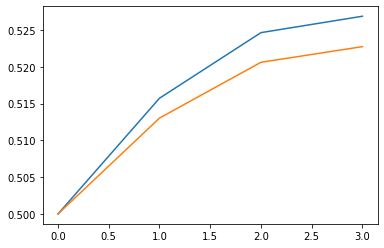

In [105]:
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(valid_score)
